# Libraries

In [188]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# PLotting

In [189]:
from plot_results import flat_data

with open("scenarios_results.json") as f:
    data = json.load(f)

df = flat_data(data)#.drop(['_source_index'], axis=1)

In [190]:
df.describe()

,_source_index,Masonry_Key,Masonry_w,Masonry_Ehor,Masonry_FtmHor,Masonry_Gt,Masonry_FmHor,Masonry_Gc,Masonry_Gd,Masonry_fvk0d,...,Uz_123,Ux_260,Uy_260,Uz_260,Ux_265,Uy_265,Uz_265,R1,R2,R3
count,319.000000,319.0,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,3.190000e+02,319.000000,319.000000
mean,91.078370,18.0,0.000025,1547.863130,0.195935,0.000509,2.055248,0.049457,770.807095,0.049679,...,-1.827363,-0.476695,-0.000013,-1.195293,0.415049,0.000012,-1.011294,-3.611721e-08,-8.612475,-985.558453
std,55.570032,0.0,0.000009,839.647847,0.114654,0.000277,1.147205,0.029164,419.066754,0.028095,...,2.768181,0.639689,0.000246,2.176740,0.588089,0.000193,1.944076,1.058905e-05,74.998994,552.217999
min,0.000000,18.0,0.000010,113.532200,0.005978,0.000020,0.132919,0.001857,55.790900,0.000382,...,-14.109076,-3.483034,-0.002946,-11.117249,-0.000739,-0.000828,-10.695942,-4.291534e-05,-522.460948,-2133.086884
25%,42.000000,18.0,0.000017,795.265700,0.093242,0.000287,1.071981,0.023276,407.553600,0.025212,...,-2.531583,-0.815678,-0.000004,-1.321240,0.000018,-0.000004,-0.813354,-3.814697e-06,-1.242801,-1436.572292
50%,92.000000,18.0,0.000024,1525.465000,0.196914,0.000507,2.044710,0.047788,768.186200,0.047997,...,-0.652832,-0.186597,0.000000,-0.112613,0.101492,0.000000,-0.067807,0.000000e+00,0.000000,-991.232468
75%,140.000000,18.0,0.000033,2295.608500,0.297310,0.000728,3.040881,0.075157,1131.279500,0.071843,...,-0.022423,-0.000033,0.000004,0.000000,0.620278,0.000002,0.000000,3.695488e-06,1.853384,-672.963379
max,187.000000,18.0,0.000040,2974.779000,0.398409,0.000993,3.992111,0.099642,1498.497000,0.098552,...,0.000000,0.000739,0.001569,0.284175,2.926106,0.002387,0.226382,5.340576e-05,426.668822,0.000000


In [191]:
name_map = {
    "Damaged_Ehor": "Interface Elastic Modulus",
    "Masonry_FmHor": "Masonry Compressive Strength",
    "Masonry_FtmHor": "Masonry Tensile Strength",
    "Masonry_Gt": "Masonry Tensile Fracture Energy",
    "Backfill_Gd": "Backfill Shear Modulus",
    "Backfill_w": "Backfill Unit Weight",
}

<Figure size 640x480 with 0 Axes>

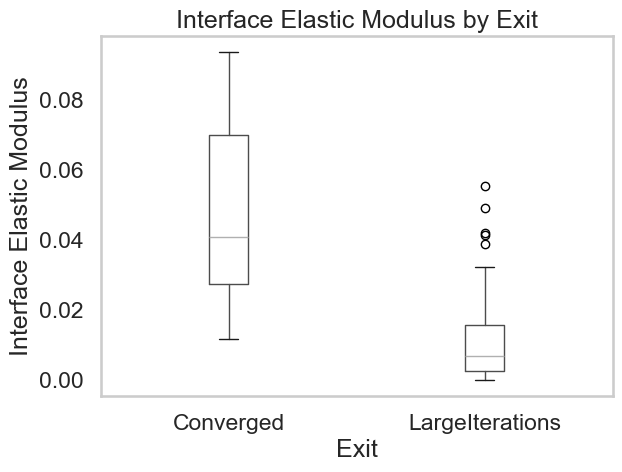

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_exit = df[df["Analysis"] == "Vert"]
df_exit = df_exit[df_exit["Damaged_Ehor"] < .1]

# 2) Boxplot by Exit
var = "Damaged_Ehor"
plt.figure()
df_exit.boxplot(column='Damaged_Ehor', by='Exit', grid=False, vert=True)
plt.title(f'{name_map.get(var, var)} by Exit')
plt.suptitle('')
plt.xlabel('Exit')
plt.ylabel(f'{name_map.get(var, var)}')
plt.show()

In [193]:
for idx in df["_source_index"].unique():
    subset = df[df["_source_index"] == idx]
    
    vert = subset.loc[subset["Analysis"] == "Vert", "R3"]
    new = subset.loc[subset["Analysis"].str.startswith("NewAnalysis"), "R3"]
    
    if not vert.empty and not new.empty:
        fmax = abs(new.values[0] - vert.values[0])
        df.loc[(df["_source_index"] == idx) & (df["Analysis"].str.startswith("NewAnalysis")), "Fmax"] = fmax

df["Fmax"] = pd.to_numeric(df["Fmax"], errors="coerce")

df = df[df["Analysis"] == "NewAnalysis"]

In [194]:
# df = df[df["Fmax"] > 200]
# df = df[df["Damaged_Ehor"] < 200]

In [195]:
corr = df.corr(method="kendall", numeric_only=True)

target_corr = corr["Fmax"].sort_values(key=lambda x: x.abs(), ascending=False).drop(
    [col for col in df.columns if col.startswith("U")] 
    + ["Fmax", "_source_index"]
    + [f"R{i}" for i in range(1, 4)]
)

target_corr = target_corr[target_corr.abs() > 0.05].head(6)

target_corr_display = target_corr.copy()
target_corr_display.index = [
    name_map.get(col, col) for col in target_corr_display.index
]

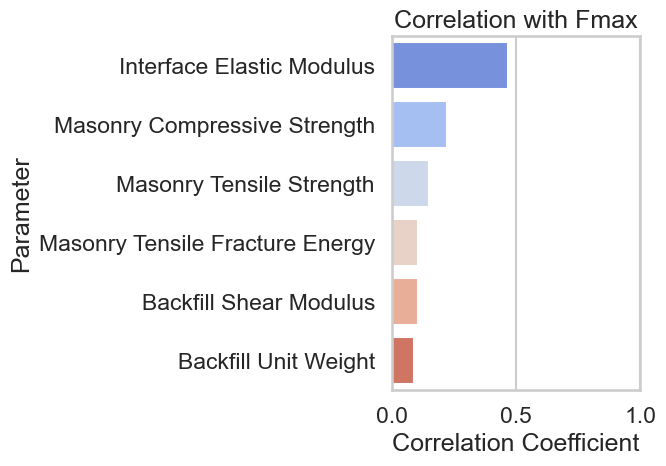

In [196]:
# plt.figure(figsize=(10, 0.5*len(target_corr_display)))
plt.figure(figsize=(7, 5))
sns.barplot(x=abs(target_corr_display.values),y=target_corr_display.index, hue=target_corr_display.index, palette="coolwarm", legend=False)
plt.title("Correlation with Fmax")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Parameter")
plt.xlim([0, 1])
plt.tight_layout()
plt.show()

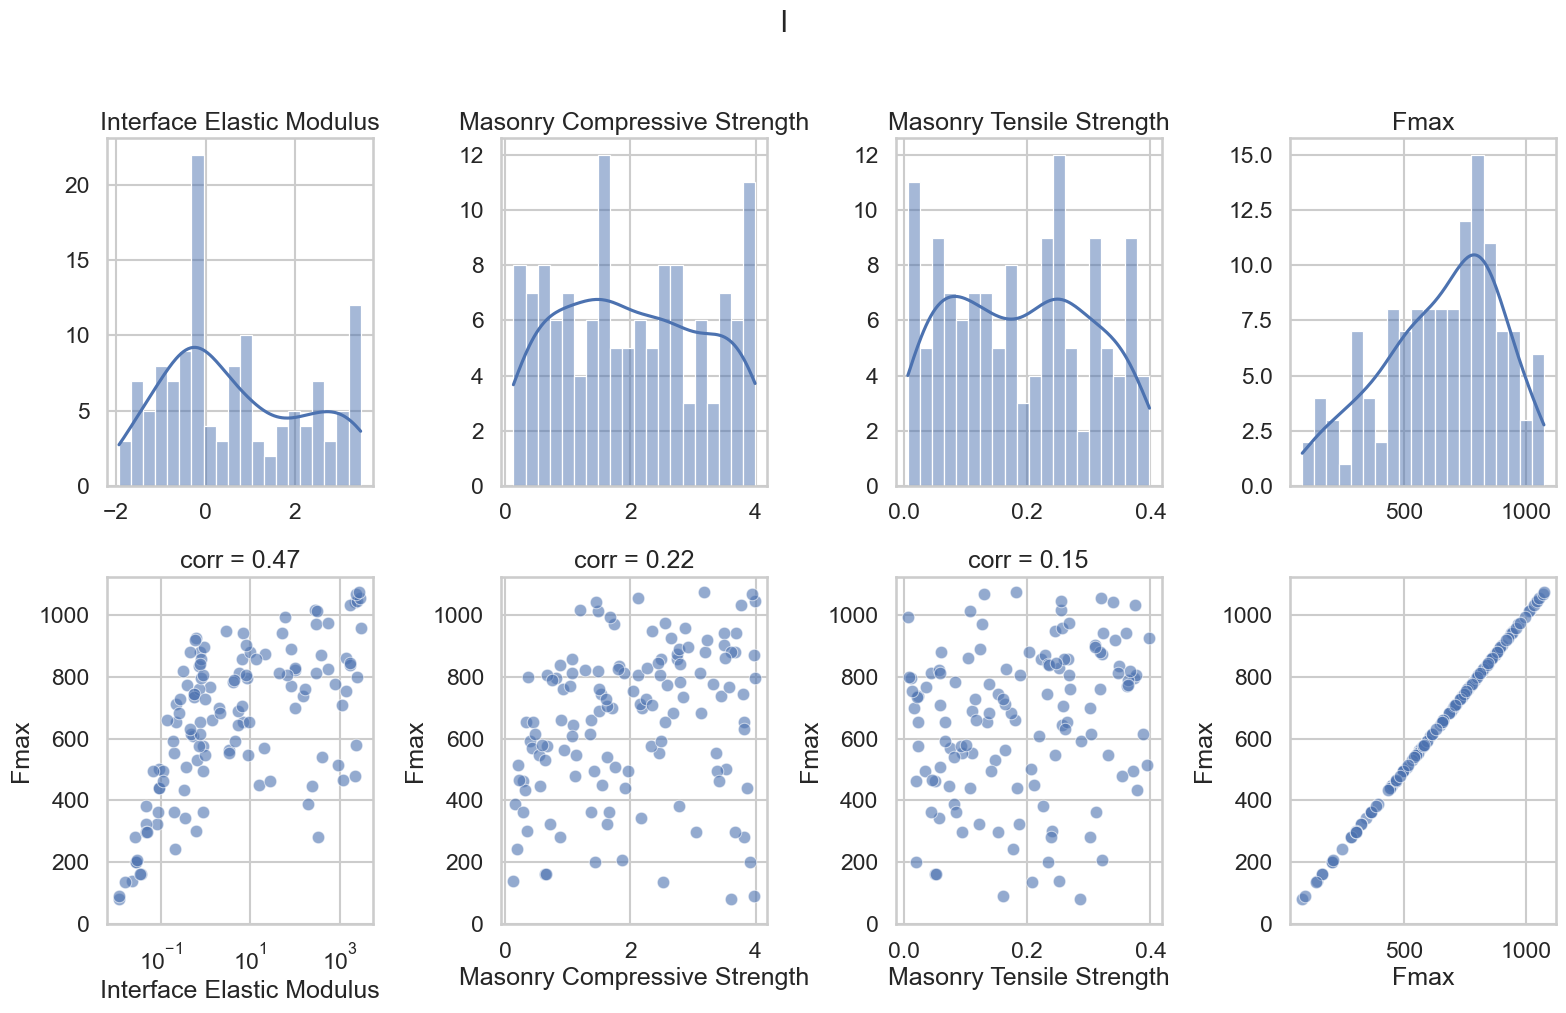

In [197]:
# Select top 5 correlated variables
top_vars = target_corr.index[:3].tolist()

# Include Uz for pairplot
vars_to_plot = top_vars + ["Fmax"]

sns.set(style="whitegrid", context="talk")

# Number of variables
n = len(vars_to_plot)

fig, axes = plt.subplots(2, n, figsize=(4 * n, 10), gridspec_kw={'height_ratios': [1, 1]})

# --- Top row: histograms
for i, var in enumerate(vars_to_plot):
    label = name_map.get(var, var)

    if var == "Damaged_Ehor":
        sns.histplot(np.log10(df[var]), bins=20, kde=True, ax=axes[0, i])    
    else:
        sns.histplot(df[var], bins=20, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"{label}")
    axes[0, i].set_xlabel("")
    axes[0, i].set_ylabel("")

# --- Bottom row: scatter plots vs Uz
for i, var in enumerate(vars_to_plot):
    label = name_map.get(var, var)
    sns.scatterplot(data=df, x=var, y="Fmax", alpha=0.6, ax=axes[1, i])
    if var == "Damaged_Ehor":
        axes[1, i].set_xscale("log")
    try:
        axes[1, i].set_title(f"corr = {target_corr[var]:.2f}")
    except KeyError:
        pass
    axes[1, i].set_xlabel(label)
    axes[1, i].set_ylabel("Fmax")
    axes[1, i].set_ylim([0, axes[1, 0].get_ylim()[1]])

plt.suptitle("l", y=1.02)
plt.tight_layout()
plt.show()

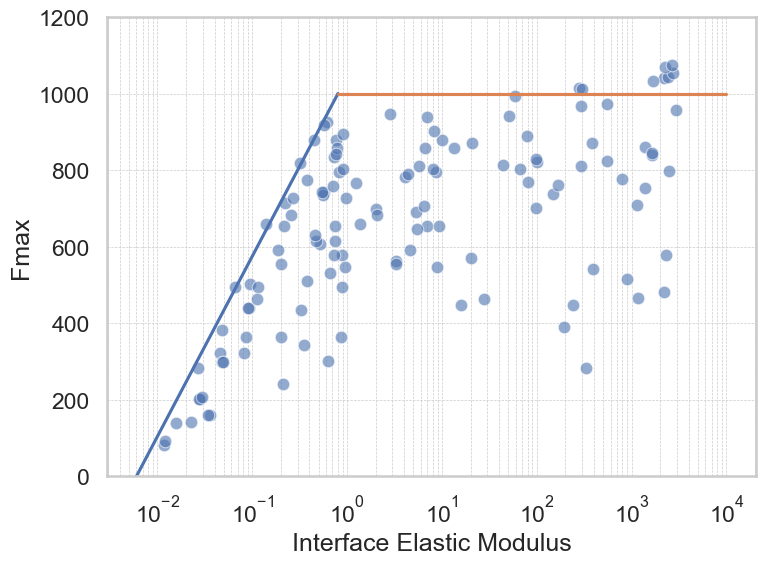

In [232]:
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(8, 6))
x, y = "Damaged_Ehor", "Fmax"
sns.scatterplot(data=df, x=x, y=y, alpha=0.6)

plt.plot([6e-3, .8e0],[0,1000])
plt.plot([.8e0, 1e4],[1000,1000])

# # Set both axes to log scale
plt.xscale("log")
# plt.yscale("log")

name_map.get(var, var)

plt.xlabel(name_map.get(x, x))
plt.ylabel(name_map.get(y, y))
# plt.title("Log–Log Plot: Fmax vs Damaged_Ehor")

plt.grid(True, which="both", ls="--", lw=0.5)
plt.ylim([0,1200])
plt.tight_layout()
plt.show()


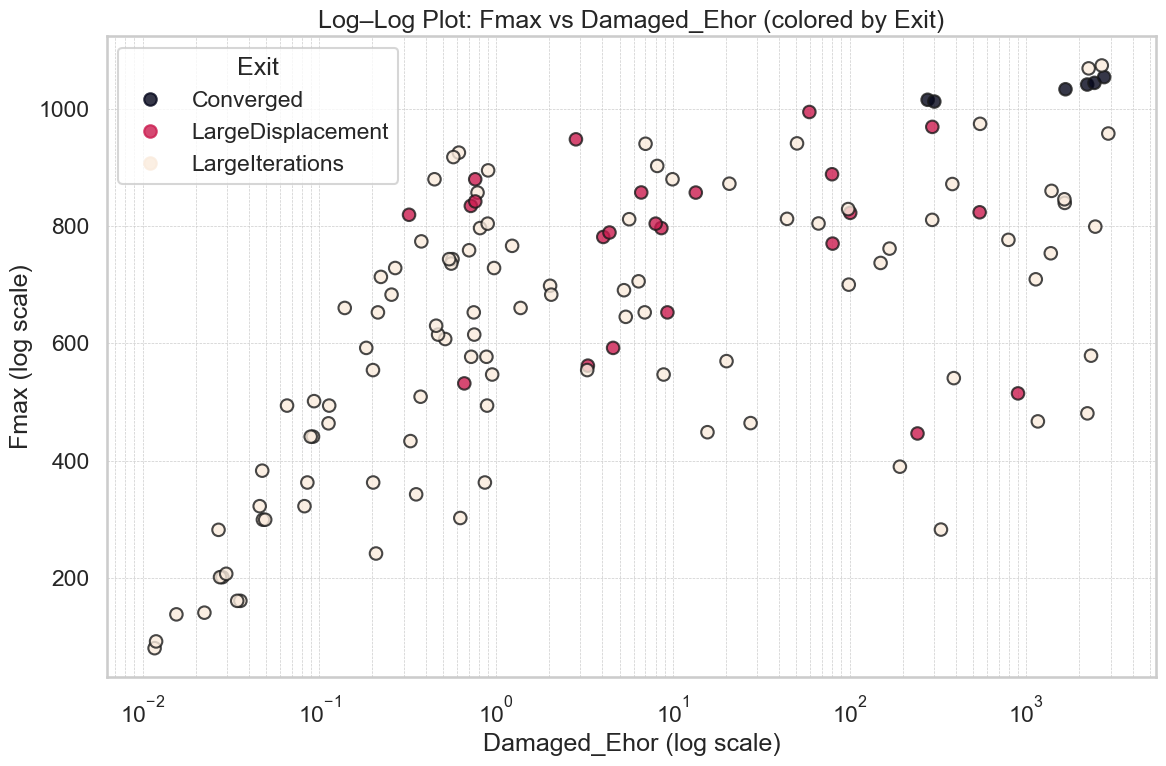

In [199]:
plt.figure(figsize=(12, 8))

# Convert Exit to categorical codes for coloring
df["Exit_encoded"] = df["Exit"].astype("category").cat.codes
categories = df["Exit"].astype("category").cat.categories

# Scatter plot with categorical colors
sc = plt.scatter(
    abs(df["Damaged_Ehor"]),
    abs(df["Fmax"]),
    c=df["Exit_encoded"],
    # cmap="tab10",       # good for categorical data (up to ~10 categories)
    alpha=0.8,
    edgecolor="k"
)

# Set both axes to log scale
plt.xscale("log")
# plt.yscale("log")

plt.xlabel("Damaged_Ehor (log scale)")
plt.ylabel("Fmax (log scale)")
plt.title("Log–Log Plot: Fmax vs Damaged_Ehor (colored by Exit)")

plt.grid(True, which="both", ls="--", lw=0.5)

# Add legend showing category names
handles, _ = sc.legend_elements()
plt.legend(handles, categories, title="Exit", loc="best")

plt.tight_layout()
plt.show()



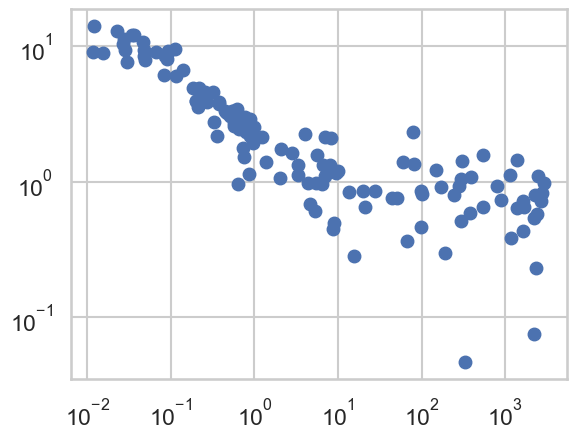

In [200]:
# plt.hist()
# np.log10(df["Uz_123"].abs()).hist()
# df["Uz_123"].abs().hist()
plt.plot(df["Damaged_Ehor"], df["Uz_123"].abs(), 'o')
plt.xscale("log")
plt.yscale("log")
